<a href="https://colab.research.google.com/github/SammarieoBrown/Natraul-Language-Processing/blob/main/Twitter_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')



In [1]:
from google.colab import files
upload = files.upload()

Saving Twitter-Auth.csv to Twitter-Auth.csv


In [5]:
df = pd.read_csv("/content/Twitter-Auth.csv")
df = df.rename(columns={"Customer Key\t\t\t": "Customer Key", 
                        "Customer Secret Key": "Customer Secret Key",
                        "Access  Token ":"Access Token",
                        "Access Secret Token":"Access Secret Token"})
consumer_key = df['Customer Key'][0]
consumer_secret = df['Customer Secret Key'][0]
access_token = df['Access Token'][0]
access_token_secret = df['Access Secret Token'][0]

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [9]:
post = api.user_timeline(screen_name ='jamaica', count =100 ,lang='en', tweet_mode='extended')



In [10]:
print("show the 5 recent tweets: \n")
i=1
for tweet in post[0:5]:
  print(str(i)+ ')' + tweet.full_text + '\n')
  i+=1

show the 5 recent tweets: 

1)https://t.co/37aSxhTCoo

2)https://t.co/z4IVn14TFq

3)https://t.co/kNu3cTqBzT

4)https://t.co/xhipvzOdWu

5)https://t.co/HE7GNyPFmN



In [ ]:
# create dataframe 

df = pd.DataFrame([tweet.full_text for tweet in post], columns=['Tweets'])

df.head()

,Tweets
0,What weighs more? \nA pound of fries or a poun...
1,"@876Soul Thank you for contacting us, please s..."
2,"@KhelsChungYing Hello KW, we've read your thre..."
3,@dalevirgo @shawnwenzel @popeyesjm Hey Dale Di...
4,"@shawnwenzel @popeyesjm Hey Shawn Wenzel, we w..."


In [ ]:
# data prepocessing/cleaning 

def cleantxt(text):
  text =  re.sub('@[A-Za-z0-9]+', '', text) # removes @mentions 
  text = re.sub(r'#','', text) # remove "#" symbol
  text = re.sub(r'RT[\s]+', '', text) # removing RT
  text = re.sub(r'https?:\/\/\S+', '', text)# remove hyperlink
  text = re.sub(r'[^\w\s]',"",text)

  return text

df['Tweets']= df['Tweets'].apply(cleantxt)



In [ ]:
# subjectivity function 

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# polarity function 

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


In [ ]:
df.head()

,Tweets,Subjectivity,Polarity
0,What weighs more \nA pound of fries or a pound...,0.500000,0.500
1,Thank you for contacting us please send us a ...,0.475000,0.225
2,Hello KW weve read your thread and thank you ...,0.000000,0.000
3,Hey Dale Dizzle Virgo definitely noted We ...,0.694444,0.250
4,Hey Shawn Wenzel we will definitely pass thi...,0.500000,0.000


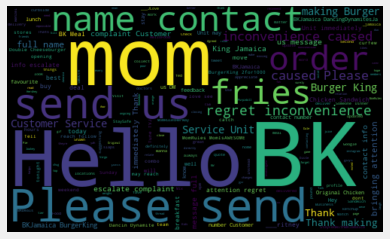

In [ ]:

# word cloud plot 

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

df['Analysis']= df ['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,What weighs more \nA pound of fries or a pound...,0.500000,0.500000,Positive
1,Thank you for contacting us please send us a ...,0.475000,0.225000,Positive
2,Hello KW weve read your thread and thank you ...,0.000000,0.000000,Neutral
3,Hey Dale Dizzle Virgo definitely noted We ...,0.694444,0.250000,Positive
4,Hey Shawn Wenzel we will definitely pass thi...,0.500000,0.000000,Neutral
...,...,...,...,...
95,,0.000000,0.000000,Neutral
96,Thanks for your hard work and dedication,0.370833,-0.045833,Negative
97,Oh look Sergeant Syntax is on duty At ease sol...,0.000000,0.000000,Neutral
98,Our 2 for 1000 deal is BACK \n\nChoose our Do...,0.420000,-0.095000,Negative


In [ ]:


# print All positive Tweets 
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ')'+ sortedDF['Tweets'][i])
    print()
    j+=1

1)What weighs more 
A pound of fries or a pound of ketchup 

2) Thank you for contacting us please send us a DM with your full name and contact info so we can investigate the matter Someone from our team will contact you directly

3)   Hey Dale Dizzle Virgo definitely noted  We will surely pass this on to our team to update our Google Business profile We appreciate you bringing this to our attention and suggesting this

4)_ Hello Tink  thank you for bringing this to our attention We regret the inconvenience caused Please send us a message with your full name and contact number so that the Customer Service Unit may reach out to you for a follow up Thank you for making it Burger King

5) Hey Purpzdoll thank you for bringing this to our attention We regret the inconvenience caused Please send us a DM with your full name and contact info so we can escalate your complaint to our Customer Service Unit immediately Thank you for making it Burger King Jamaica

6) This is a very close second 

7

In [ ]:
# negative tweets 
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ')'+ sortedDF['Tweets'][i])
    print()
    j+=1

1) It is impossible to not chug  orange juice 

2)  Original Chicken sandwich combo 

3)_ We dont mean to laugh but 

4) Hello tHeONicK thank you for your feedback on this matter We regret the inconvenience caused Please send us a private message with your name and contact details We will escalate this complaint to our Customer Service Unit Thank you so much for making it Burger King Jamaica

5)MoBay peeps you can now feast like a King while at home Use any of our partnered delivery options to get our 2 For 1000 deal or any other item on our menu
Delivery begins today April 9 from 1030 AM  800 PM Lock in your orders and fret not about curfew hunger
BKJamaica 

6)Waking up for work after 4 Sundays is a drag Are you guys handling this well 

7)Double Cheeseburger or the Original Chicken Sandwich

Reply with the emoji to tell us which side youre on 

BKJamaica BurgerKing 2for1000 

8) Thanks for your hard work and dedication  

9) Our 2 for 1000 deal is BACK 

Choose our Double Cheeseburg

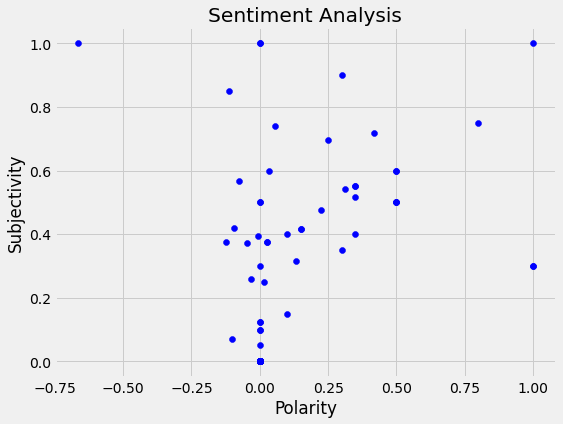

In [ ]:
#plot the polarity and  subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# percentage of positive tweets 
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)



29.0

In [ ]:

#negative Tweets %

ntweets = df[df.Analysis=="Negative"]
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100,1)

9.0

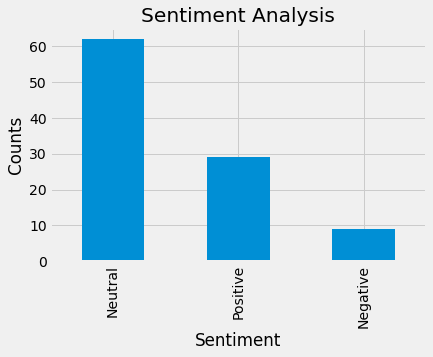

In [ ]:
# value count
df['Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
